<a href="https://colab.research.google.com/github/neto-riga/metodos_numericos_2/blob/main/5_interpolaci%C3%B3n_de_lagrange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Regresar al ínidce](https://github.com/neto-riga/metodos_numericos_2/blob/main/portafolio.md#índice)

#Interpolación de Lagrange 
----



La siguiente tabla muestra el porcentaje de divorcios por año de un estado particular. 

|Año|Divorcios|
|---|---------|
|12|7.9|
|14|13.1|
|15|10.7|
|18|18.6|

* Estimar el porcentaje de divorcios para el año 2016.
* Construye polinomios de grado 2 y 3 para las estimaciones. 
* Elabora gráficas. 
* Realiza comparaciones y saca tus conclusiones.

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme()

Implementamos el método.

In [ ]:
def cocientes_lag(x, n, val, pos, lugar_inicial):
  """ Determinar el cociente de Lagrange pasando un
  vector de tamaño n+1, una constante con valor n, el
  valor a sustituir, y el número del cociente."""

  numerador = 1
  denominador = 1
  for i in range(n):
    if i != pos:
      numerador *= val - x[i+lugar_inicial]
      denominador *= x[pos+lugar_inicial] - x[i+lugar_inicial] 
  return numerador / denominador
def polinomio_lag(x, y, grado, val, lugar_x0):
  res = 0
  C=[]
  for i in range(grado):
    res += cocientes_lag(x, grado, val, i, lugar_x0) * y[i+lugar_x0]
  return res

Realizamos las aproximaciones para $f(16)$ con los polinomios de segundo y tercer grado, además se muestran dichas aproximaciones.

In [ ]:
año = [12, 14, 15, 18]
divorcios = [7.9, 13.1, 10.7, 18.6]
val=16
# Estimando con polinomio de grado 2
g2=polinomio_lag(año, divorcios, 3, val=16, lugar_x0=1)
# Estimando con polinomio de grado 3
g3=polinomio_lag(año, divorcios, 4, val=16, lugar_x0=0)
G=[g2,g3]
df=pd.DataFrame()
df['n']=[2,3]
df[f'Pn({val})']=G
df2 = df.set_index('n')
df2

,Pn(16)
n,
2,10.816667
3,8.866667


Observamos las graficas de las funciones generadas con el método.

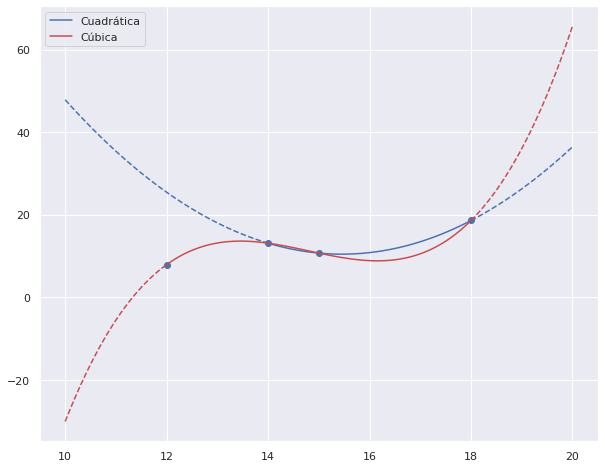

In [ ]:
#@title
fig=plt.figure(figsize=(10,8))
X1 = np.linspace(14, 18, 100)
X2=np.linspace(12, 18, 100)
X11=np.linspace(10, 14, 100)
X12=np.linspace(18, 20, 100)
X3=np.linspace(10, 12, 100)
plt.plot(X1, polinomio_lag(año, divorcios, 3, X1, 1),color='b',label="Cuadrática")
plt.plot(X11, polinomio_lag(año, divorcios, 3, X11, 1),linestyle='--',color='b')
plt.plot(X12, polinomio_lag(año, divorcios, 3, X12, 1),linestyle='--',color='b')
plt.plot(X12, polinomio_lag(año, divorcios, 4, X12, 0),linestyle='--',color='r')
plt.plot(X3, polinomio_lag(año, divorcios, 4, X3, 0),linestyle='--',color='r')
plt.plot(X2, polinomio_lag(año, divorcios, 4, X2, 0),color='r',label="Cúbica")
plt.scatter(año,divorcios)
plt.legend(loc="upper left")
plt.rc('legend', fontsize=15)

Notemos que $P_{3}(X)$ nos proporciona una mejor aproximación a $P(16)$, pues toma en cuenta todos los datos que nos son proporcionados.

## [Regresar al ínidce](https://github.com/neto-riga/metodos_numericos_2/blob/main/portafolio.md#índice)